

# **INTEGRANTES**



*   Casanova, Beverly
*   Nuñez, Lourdes

*   Perez, Micaela
*   Cardozo, Pamela




# **¿QUÉ ES UN FRAUDE?**

Se trara de un delito contra la propiedad que consiste en defraudar a otro utilizando algún tipo de engaño. La pena prevista para el delito de estafa es la prisión de un mes a 6 años, según el artículo 175 del Código Penal de la Nación Argentina.


**¿CUANDO ES FRAUDE FINANCIERO?**

Esto ocurre cuando una persona lo priva de su dinero, o capital o de otra manera daña su salud financiera por medio de prácticas engañosas,confusas u otras prácticas ilegales. Esto se puede hacer a través de una variedad de métodos como robo de identidad o fraude de inversión.


**MODALIDADES COMUNES DE FRAUDE FINANCIERO :**




1.   **Fraude Contable:** Manipulación de los estados financieros de una empresa para presentar una imagen falsa de su situación económica.

2.   **Esquemas Ponzi:** Estrategias de inversión fraudulentas que prometen altas tasas de retorno con poco riesgo para los inversores.

3.   **Fraude con Tarjetas de Crédito:** Uso no autorizado de tarjetas de crédito para realizar compras o retirar fondos.


4.   **Lavado de Dinero:** Proceso de hacer que el dinero obtenido de actividades ilegales parezca legítimo.


5.   **Ciberfraude:** Ataques cibernéticos para robar información financiera, realizar transferencias fraudulentas o cometer otros delitos relacionados con la tecnología.






#**FRAUDES FINANCIEROS**

En el presente trabajo se hace un análisis sobre un tema de gran relevancia en el mundo financiero: el **fraude con tarjetas de crédito**. Este fenómeno, que
afecta tanto a consumidores como a instituciones financieras, ha cobrado
importancia debido al aumento de las transacciones electrónicas y al uso generalizado de tarjetas de crédito.

Nuestro análisis se basa en un conjunto de datos detallado que recoge diversas transacciones con tarjetas de crédito, clasificadas según si son fraudulentas o no. Este dataset proporciona una oportunidad única para explorar los patrones y características que distinguen a las transacciones legítimas de las fraudulentas.

Este proyecto no solo busca identificar transacciones fraudulentas de manera eficiente, sino también proporcionar herramientas y conocimientos que pueden ser aplicados en contextos similares de detección de fraudes.






## Objetivos del proyecto

*   Detectar patrones en fraudes considerenado hora del dia, categoria y lugar.
*   Entender cómo y por qué ocurren los fraudes con tarjetas de crédito
*   Identificar variables relevantes para la detección de fraude




## Origen del Dataset

Debido a que la mayoría de los Dataset de Argentina son incompletos,con pocos datos y en su mayoría privados, elegimos un Dataset Internacional, y simularemos que es un banco de Argentina.
Proporcionamos el link de nuestro Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

# CARGAMOS LIBRERÍAS A UTILIZAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import drive #importamos
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**REALIZAMOS LA LECTURA DE NUESTRA BASE DE DATOS**

In [2]:
df_fraude = pd.read_csv('credit_card_fraud.csv', delimiter=',',index_col=0)

In [ ]:
# Leemos el archivo csv
df_fraude = pd.read_csv('/content/drive/My Drive/Curso Ingenias/fraud_test.csv', delimiter=',',index_col=0)

# DETALLES DE LA BASE DE DATOS

---






In [3]:
#Visualizamos el dataframe
df_fraude.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Se observa cuantas filas y columnas tiene
print("\nEl dataframe tiene {} filas y {} columnas.".format(df_fraude.shape[0], df_fraude.shape[1]))


El dataframe tiene 555719 filas y 22 columnas.


In [5]:
# Obtenemos información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(df_fraude.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 1

# COLUMNAS

**`Descripción de las Variables`**
* **Trans_date_trans_time**: Marca de tiempo de la transacción (fecha y hora).
* **Cc_num**: Número de identificación único del cliente.
* **Merchant**: El comerciante involucrado en la transacción.
* **Category**: Tipo de transacción (por ejemplo, personal, cuidado de niños).
* **Amt**: Monto de la transacción.
* **First**: Nombre del titular de la tarjeta.
* **Last**: Apellido del titular de la tarjeta.
* **Gender**: Género del titular de la tarjeta.
* **Street**: Dirección del titular de la tarjeta.
* **City**: Ciudad de residencia del titular de la tarjeta.
* **State**: Estado de residencia del titular de la tarjeta.
* **Zip**: Código postal del titular de la tarjeta.
* **Lat**: Latitud de la ubicación del titular de la tarjeta.
* **Long**: Longitud de la ubicación del titular de la tarjeta.
* **City_pop**: Población de la ciudad del titular de la tarjeta.
* **Job**: Título del trabajo del titular de la tarjeta.
* **Dob**: Fecha de nacimiento del titular de la tarjeta.
* **Trans_num**: Identificador único de la transacción.
* **Unix_time**: Marca de tiempo de la transacción (formato Unix).
* Merch_lat: Ubicación del comerciante (latitud).
* Merch_long: Ubicación del comerciante (longitud).
* Is_fraud: Indicador de transacción fraudulenta (1 = fraude, 0 = legítima). Esta es la variable objetivo para propósitos de clasificación.

In [6]:
# Visualizamos las columnas
df_fraude.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# Para facilitar nuestro dataset, se renombran las columnnas de ingles a español.
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombramos las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostramos los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['fecha_transaccion', 'num_tarjeta', 'comerciante', 'categoria', 'monto',
       'nombre', 'apellido', 'genero', 'calle', 'ciudad', 'estado',
       'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad', 'trabajo',
       'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


In [8]:
# Visualizamos el dataset para ver el cambio de columnas renombradas.
df_fraude.head()

,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,ciudad,...,latitud,longitud,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
# Mostramos el tipo de dato de cada columna.
df_fraude.dtypes

fecha_transaccion        object
num_tarjeta             float64
comerciante              object
categoria                object
monto                   float64
nombre                   object
apellido                 object
genero                   object
calle                    object
ciudad                   object
estado                   object
codigo_postal             int64
latitud                 float64
longitud                float64
poblacion_ciudad          int64
trabajo                  object
fecha_nacimiento         object
num_transaccion          object
tiempo_unix               int64
latitud_comerciante     float64
longitud_comerciante    float64
es_fraude                 int64
dtype: object

Se demuestra que cada columna coincide con su tipo de dato

**Cualitativas (Categóricas):**
fecha_transaccion, comerciante, categoria, nombre, apellido, genero, calle, ciudad, estado, trabajo, fecha_nacimiento, num_transaccion.

**Cuantitativas (Numéricas):**

**Discretas:** codigo_postal, poblacion_ciudad, es_fraude.

**Continuas:** num_tarjeta, monto, latitud, longitud, tiempo_unix, latitud_comerciante, longitud_comerciante.

****

**`DETALLES DE LAS COLUMNAS`**

In [10]:
# Vemos si hay datos nulos.
df_fraude.isnull().sum()

fecha_transaccion       0
num_tarjeta             0
comerciante             0
categoria               0
monto                   0
nombre                  0
apellido                0
genero                  0
calle                   0
ciudad                  0
estado                  0
codigo_postal           0
latitud                 0
longitud                0
poblacion_ciudad        0
trabajo                 0
fecha_nacimiento        0
num_transaccion         0
tiempo_unix             0
latitud_comerciante     0
longitud_comerciante    0
es_fraude               0
dtype: int64

OBSERVACIÓN: Se ve que no hay valores nulos en las columnas del Dataset.

**`COLUMNAS FECHA Y HORA`**

Se crean columnas nuevas para tener la fecha y hora separadas.

In [11]:
df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.date
df_fraude['trans_hora'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.hour

# Verificamos las nuevas columnas
df_fraude.head()

C:\Users\mikpz\AppData\Local\Temp\ipykernel_4992\1693156118.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.date
C:\Users\mikpz\AppData\Local\Temp\ipykernel_4992\1693156118.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_hora'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.hour


,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,ciudad,...,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12


In [12]:
# renombramos la columna de inglés a español
categorias_renombradas = {
    'gas_transport': 'gasolina_transporte',
    'grocery_pos': 'supermercado',
    'home': 'hogar',
    'shopping_pos': 'compras',
    'kids_pets': 'niños_mascotas',
    'shopping_net': 'compras_en_linea',
    'entertainment': 'entretenimiento',
    'personal_care': 'cuidado_personal',
    'food_dining': 'comida',
    'health_fitness': 'salud_ejercicio',
    'misc_pos': 'varios',
    'misc_net': 'varios_en_linea',
    'grocery_net': 'supermercado_en_linea',
    'travel': 'viajes'
}

# Renombramos la columna
df_fraude['categoria'] = df_fraude['categoria'].replace(categorias_renombradas)
df_fraude['categoria'].value_counts()

categoria
gasolina_transporte      56370
supermercado             52553
hogar                    52345
compras                  49791
niños_mascotas           48692
compras_en_linea         41779
entretenimiento          40104
cuidado_personal         39327
comida                   39268
salud_ejercicio          36674
varios                   34574
varios_en_linea          27367
supermercado_en_linea    19426
viajes                   17449
Name: count, dtype: int64

**`COLUMNA GÉNERO`**

In [13]:
df_fraude['genero'].value_counts()

genero
F    304886
M    250833
Name: count, dtype: int64

**`COLUMNA EDAD CLIENTE`**

Se creo una columna edad que muestra la edad del cliente

In [14]:
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])
df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['trans_fecha'])
df_fraude['edad_cliente'] = df_fraude['trans_fecha'].dt.year - df_fraude['fecha_nacimiento'].dt.year

C:\Users\mikpz\AppData\Local\Temp\ipykernel_4992\641456654.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])


**`COLUMNA GRUPO EDAD`**

Se creo una columna grupo_edad que muestra la categria de edad que pertenece el cliente. Es decir :
- Edad menor y igual a 18 : Adolescente
- Edad entre 18 y 25 : Joven Adulto
- Edad entre 25 y 64 : Adulto
- Edad mayor a 64 : Jubilado

In [20]:
def aplicar_grupo_edad(edad):
    if edad <= 18:
        return 'Adolescente'
    elif edad <= 25:
        return 'Joven Adulto'
    elif edad <= 64:
        return 'Adulto'
    else:
        return 'Jubilado'


df_fraude['grupo_edad'] = df_fraude['edad_cliente'].apply(aplicar_grupo_edad)

df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha_transaccion     555719 non-null  object        
 1   num_tarjeta           555719 non-null  float64       
 2   comerciante           555719 non-null  object        
 3   categoria             555719 non-null  object        
 4   monto                 555719 non-null  float64       
 5   nombre                555719 non-null  object        
 6   apellido              555719 non-null  object        
 7   genero                555719 non-null  object        
 8   calle                 555719 non-null  object        
 9   ciudad                555719 non-null  object        
 10  estado                555719 non-null  object        
 11  codigo_postal         555719 non-null  int64         
 12  latitud               555719 non-null  float64       
 13  long

**`COLUMNA ESTADOS`**

Revisamos los valores únicos para estado:

In [21]:
estados_unicos = df_fraude['estado'].unique()
# Mostramos los estados únicos
print("Estados únicos en transacciones fraudulentas:")
print(estados_unicos)

Estados únicos en transacciones fraudulentas:
['SC' 'UT' 'NY' 'FL' 'MI' 'CA' 'SD' 'PA' 'TX' 'KY' 'WY' 'AL' 'LA' 'GA'
 'CO' 'OH' 'WI' 'VT' 'AR' 'NJ' 'IA' 'MD' 'MS' 'KS' 'IL' 'MO' 'ME' 'TN'
 'DC' 'AZ' 'MT' 'MN' 'OK' 'WA' 'WV' 'NM' 'MA' 'NE' 'VA' 'ID' 'OR' 'IN'
 'NC' 'NH' 'ND' 'CT' 'NV' 'HI' 'RI' 'AK']


Realizamos un conteo de cada uno de los estados

In [22]:
conteo_estados = df_fraude['estado'].value_counts()
# Mostramos el conteo de estados
print("Conteo de transacciones por estado:")
print(conteo_estados)

Conteo de transacciones por estado:
estado
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64


**`COLUMNA TRANS-HORA`**

Revisamos los valores únicos para trans-hora

In [23]:
valores_unicos = df_fraude["trans_hora"].unique()
# Mostramos los valores únicos
print("Valores únicos de 'trans_hora':")
print(valores_unicos)

Valores únicos de 'trans_hora':
[12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11]


In [24]:
conteos_por_hora = df_fraude.groupby("trans_hora").size().reset_index(name='cantidad')

# Ordenamos de mayor a menor
conteos_por_hora = conteos_por_hora.sort_values(by='cantidad', ascending=False)

# Mostramos los valores de cuenta de eventos por hora
print(conteos_por_hora)

    trans_hora  cantidad
23          23     28798
16          16     28563
22          22     28388
21          21     28205
14          14     28204
13          13     28178
17          17     28064
15          15     28048
12          12     28037
18          18     28001
20          20     27983
19          19     27925
1            1     18461
3            3     18199
0            0     18153
2            2     18140
6            6     18106
7            7     18098
11          11     18088
4            4     18075
10          10     18049
9            9     18046
8            8     17993
5            5     17917


**`COLUMNA TRANS-MES Y TRANS_diaDeLaSemana`**

Se han creado nuevas columnas en el conjunto de datos para facilitar el análisis de las transacciones a lo largo de los meses y los días de la semana. Estas columnas adicionales permitirán observar y comparar las variaciones en el comportamiento de fraude según el mes y el día, proporcionando una visión más detallada sobre cómo estos factores pueden influir en los patrones de fraude.

In [46]:
# Asegúrate de que la columna 'fecha_transaccion' es de tipo datetime
df_fraude['fecha_transaccion'] = pd.to_datetime(df_fraude['fecha_transaccion'])


# Extrae el mes de la transacción
df_fraude['trans_mes'] = df_fraude['fecha_transaccion'].dt.to_period('M').astype("str")  # Extraer el mes en formato de periodo

# Extraer el nombre del día de la semana de 'fecha_transaccion'
df_fraude['trans_diaDeLaSemana'] = df_fraude['fecha_transaccion'].dt.day_name()  # Extraer el nombre del día de la semana

# Verifica las primeras filas para asegurarte de que la operación se realizó correctamente
df_fraude.head(5)

C:\Users\mikpz\AppData\Local\Temp\ipykernel_4992\3656247858.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['fecha_transaccion'] = pd.to_datetime(df_fraude['fecha_transaccion'])


,fecha_transaccion,categoria,monto,genero,ciudad,estado,latitud,longitud,poblacion_ciudad,trabajo,fecha_nacimiento,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora,edad_cliente,grupo_edad,trans_mes,trans_diaDeLaSemana
0,2020-06-21 12:14:00,cuidado_personal,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,12,52,Adulto,2020-06,Sunday
1,2020-06-21 12:14:00,cuidado_personal,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,12,30,Adulto,2020-06,Sunday
2,2020-06-21 12:14:00,salud_ejercicio,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,12,50,Adulto,2020-06,Sunday
3,2020-06-21 12:15:00,varios,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,12,33,Adulto,2020-06,Sunday
4,2020-06-21 12:15:00,viajes,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,12,65,Jubilado,2020-06,Sunday


# DETALLES ESTADÍSTICOS

In [47]:
df_fraude.describe()

,fecha_transaccion,monto,latitud,longitud,poblacion_ciudad,fecha_nacimiento,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora,edad_cliente
count,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,555719.000000,555719.000000,555719,555719.000000,555719.000000
mean,2020-10-02 01:53:55.673389056,69.392810,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,38.542798,-90.231380,0.003860,2020-10-01 12:35:52.929807872,12.809062,46.636237
min,2020-06-21 12:14:00,1.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,19.027422,-166.671575,0.000000,2020-06-21 00:00:00,0.000000,15.000000
25%,2020-08-09 06:10:00,9.630000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,34.755302,-96.905129,0.000000,2020-08-09 00:00:00,7.000000,33.000000
50%,2020-10-03 00:59:00,47.290000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,39.376593,-87.445204,0.000000,2020-10-03 00:00:00,14.000000,45.000000
75%,2020-12-01 03:02:30,83.010000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,41.954163,-80.264637,0.000000,2020-12-01 00:00:00,19.000000,58.000000
max,2020-12-31 23:59:00,22768.110000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,66.679297,-66.952026,1.000000,2020-12-31 00:00:00,23.000000,96.000000
std,NaN,156.745941,5.061336,13.721780,3.003909e+05,NaN,5.095829,13.733071,0.062008,NaN,6.810924,17.418528


OBSERVACIÓN:
El análisis estadístico de las transacciones de tarjetas de crédito muestra lo siguiente:

Se procesaron un total de 555.719 transacciones. El monto promedio de las transacciones es `$69,39`, con una desviación estándar de `$156.75`, un mínimo de `$1.00` y un máximo de `$22,768.11`.

Las ciudades donde se realizaron las transacciones tienen una población media de 88.221 habitantes, con una desviación estándar de 303.909, un mínimo de 23 y un máximo de 2.906.700 habitantes. El tiempo Unix promedio de las transacciones es 1.38e+09, con una desviación estándar de 5.20e+06.

Finalmente, la proporción de transacciones fraudulentas es muy baja, con una media de 0.00386 y una desviación estándar de 0.062, variando entre 0 (no fraude) y 1 (fraude).

# GRÁFICOS DE ANÁLISIS

**`PORCENTAJE FRAUDE Y NO FRAUDE`**

Text(0.5, 1.0, 'Porcentaje del Fraude')

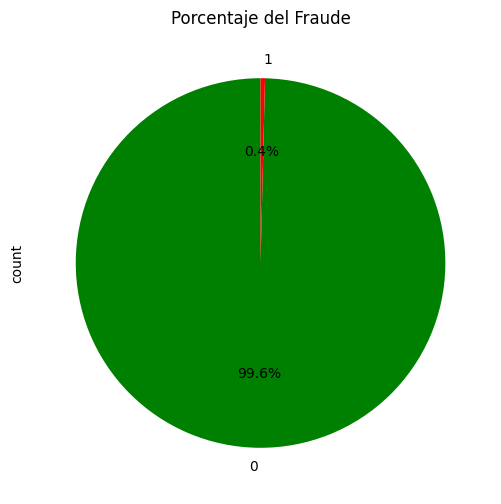

In [26]:
# Vemos el porcentaje del fraude y no fraude
plt.figure(figsize=(6, 6))
df_fraude['es_fraude'].value_counts().plot.pie(autopct = '%.1f%%',colors = ['green', 'red'], startangle=90)
plt.title('Porcentaje del Fraude')


OBSERVACIÓN: El gráfico pastel nos proporciona una visualización rápida de la proporción de fraudes en el conjunto de datos confirmando que las transacciones fraudulentas (en rojo) representan una pequeña fracción del total.

**`MONTOS FRAUDE Y NO FRAUDE`**

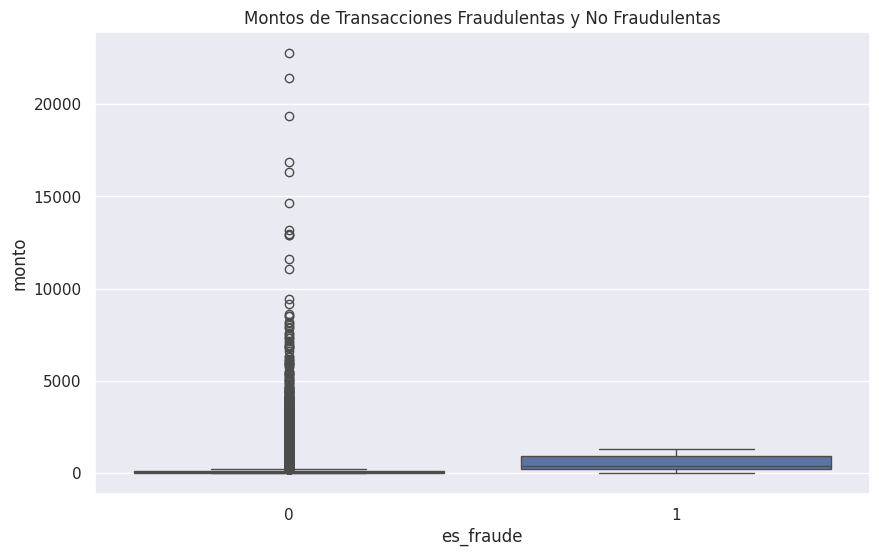

In [ ]:
# Comparamos los montos en transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(10, 6))
sns.boxplot(x='es_fraude', y='monto', data=df_fraude)
plt.title('Montos de Transacciones Fraudulentas y No Fraudulentas')
plt.show()

OBSERVACIÓN: Este gráfico de caja muestra la distribución de los montos de transacciones de tarjetas de crédito, comparando las transacciones fraudulentas (1) con las no fraudulentas (0). Los fraudes en tarjetas de crédito tienden a implicar montos más altos en comparación con las transacciones legítimas, lo que puede ser una indicación útil para la detección de fraudes. Además, la dispersión de los montos en las transacciones fraudulentas es mayor, indicando una mayor variabilidad en el valor de estas transacciones.

**`FRAUDE`**

In [27]:
# Filtramos el DataFrame para seleccionar solo las filas donde isFraud es 1
transacciones_fraudulentas = df_fraude[df_fraude['es_fraude'] == 1]

# Mostramos detalles de las transacciones fraudulentas
print("Detalles de las transacciones fraudulentas:")
print(transacciones_fraudulentas.head())

Detalles de las transacciones fraudulentas:
     fecha_transaccion   num_tarjeta                          comerciante  \
1685  21/06/2020 22:06  3.560730e+15                 fraud_Hamill-D'Amore   
1767  21/06/2020 22:32  6.564460e+15    fraud_Rodriguez, Yost and Jenkins   
1781  21/06/2020 22:37  6.564460e+15                     fraud_Nienow PLC   
1784  21/06/2020 22:38  4.005680e+15  fraud_Heathcote, Yost and Kertzmann   
1857  21/06/2020 23:02  3.560730e+15               fraud_Hermann and Sons   

             categoria    monto   nombre apellido genero  \
1685   salud_ejercicio    24.84   Brooke    Smith      F   
1767   varios_en_linea   780.52  Douglas   Willis      M   
1781   entretenimiento   620.33  Douglas   Willis      M   
1784  compras_en_linea  1077.69  William    Perry      M   
1857           compras   842.65   Brooke    Smith      F   

                             calle          ciudad  ... fecha_nacimiento  \
1685     63542 Luna Brook Apt. 012         Notrees  ... 

Se filtro el dataset por fraude ya que es donde nos enfocaremos este analisis

**`PORCENTAJE POR GRUPO DE EDAD`**

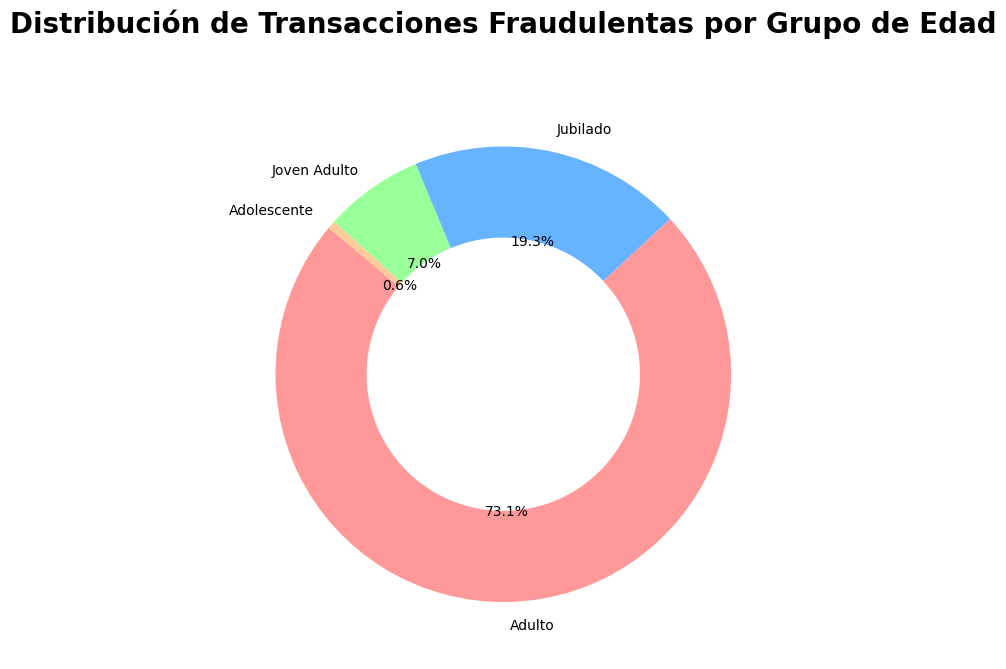

In [33]:
import matplotlib.pyplot as plt

# Función para graficar la distribución de transacciones fraudulentas por grupo de edad
def plot_transactions_by_age_group(df_fraude):
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.suptitle("Distribución de Transacciones Fraudulentas por Grupo de Edad", fontsize=20, fontweight='bold')


    # Contar las transacciones por grupo de edad
    age_counts = df_fraude['grupo_edad'].value_counts()

    # Definir colores
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

    # Crear gráfico de torta
    ax.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=colors,
           startangle=140, wedgeprops=dict(width=0.4))
    #ax.set_title("Fraude")

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_age_group(transacciones_fraudulentas)


**`PORCENTAJE POR GÉNERO`**

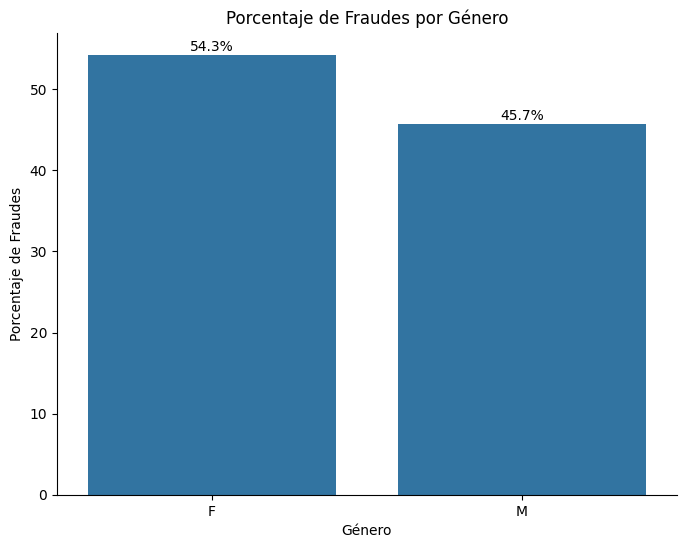

In [34]:
fraud_percentage = transacciones_fraudulentas['genero'].value_counts(normalize=True) * 100

#tabla nueva
percentage_df = fraud_percentage.reset_index()
percentage_df.columns = ['genero', 'percentage']
# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='genero', y='percentage', data=percentage_df)
sns.despine()
# Etiquetas y título
plt.xlabel('Género')
plt.ylabel('Porcentaje de Fraudes')
plt.title('Porcentaje de Fraudes por Género')

# Añadimos porcentajes encima de las barras
for index, row in percentage_df.iterrows():
    plt.text(index, row['percentage'] + 0.5, f'{row["percentage"]:.1f}%', ha='center', color='black', fontsize=10)

# Mostramos el gráfico
plt.show()

OBSERVACIÓN: Según los datos representados en el gráfico, el género femenino tiene un porcentaje más alto de fraudes en comparación con el género masculino.

**`FRECUENCIA DE CATEGORiAS`**

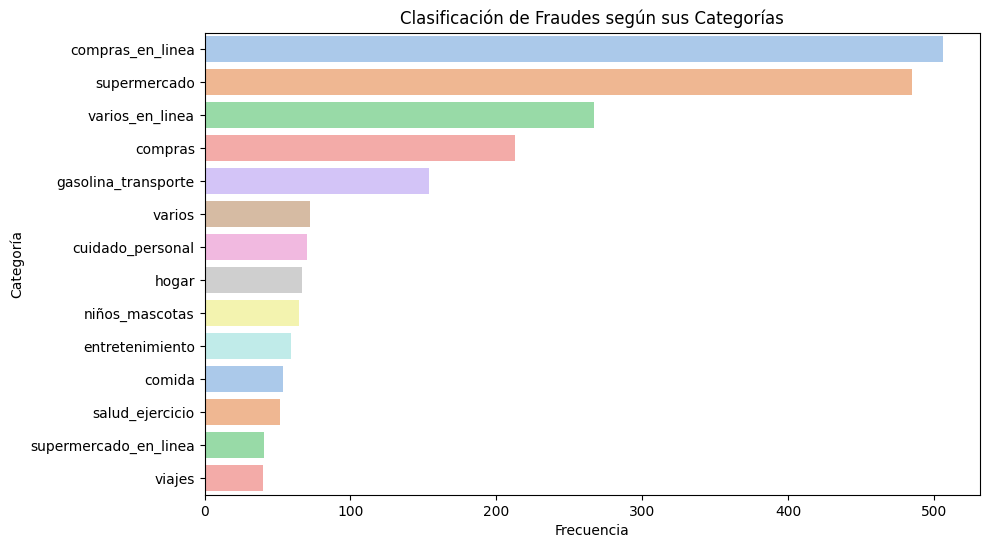

In [35]:
# Calculamos la frecuencia de cada categoría
category_counts = transacciones_fraudulentas['categoria'].value_counts()

# Ordenamos las categorías por frecuencia
category_counts = category_counts.sort_values(ascending=False)

# Creamos un gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel', hue=category_counts.index, dodge=False, legend=False)

# Establecemos etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Clasificación de Fraudes según sus Categorías')

# Mostramos el gráfico
plt.show()

OBSERVACIÓN: Las 5 categorías más frecuentes son



1.   Compras en linea
2.   Supermercado
3.   Varios en linea
4.   Compras
5.   Gasolina transporte











**`DIAGRAMA DE DISPERSIÓN`**

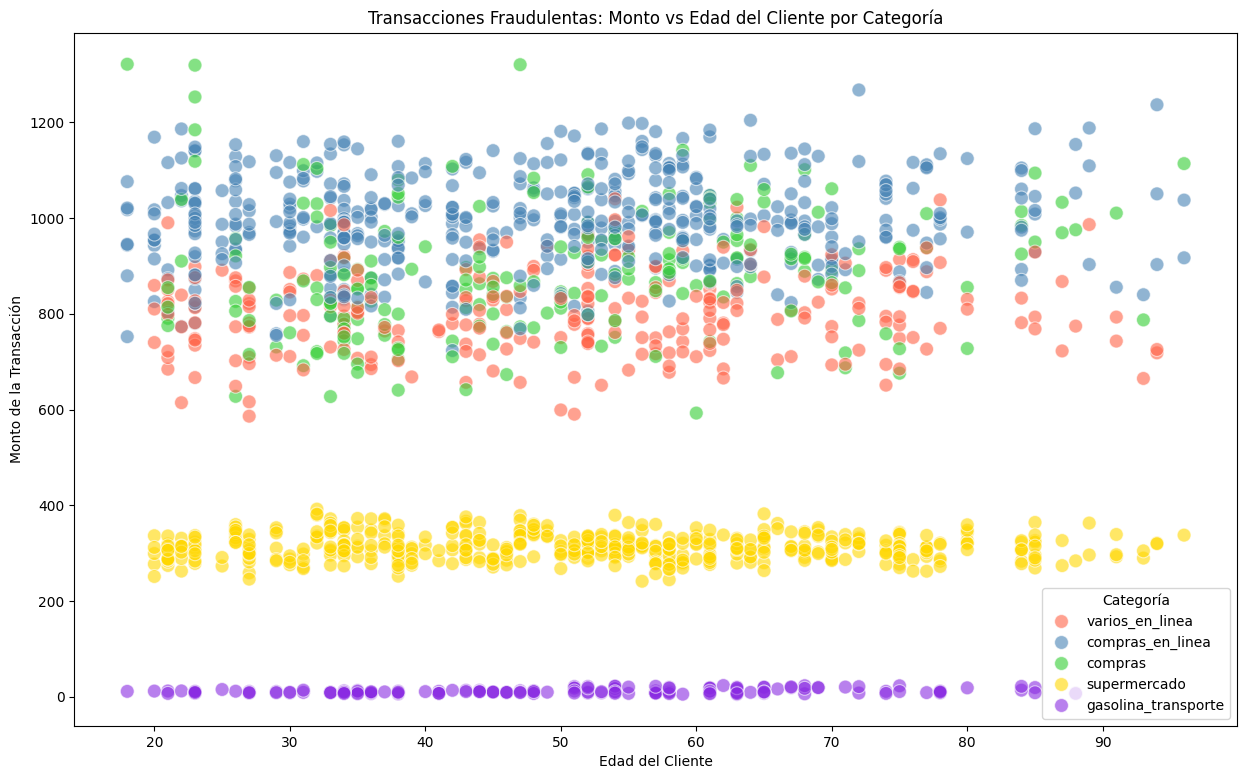

In [36]:
# Filtramos el DataFrame para seleccionar solo las categorías específicas
categorias_interes = ["compras_en_linea", "supermercado", "varios_en_linea", "compras", "gasolina_transporte"]
transacciones_filtradas = transacciones_fraudulentas[transacciones_fraudulentas['categoria'].isin(categorias_interes)]

# Definimos una paleta de colores
paleta_colores = sns.color_palette(["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2"])

# Creamos el gráfico de dispersión
plt.figure(figsize=(15, 9))
sns.scatterplot(x='edad_cliente', y='monto', data=transacciones_filtradas, hue='categoria', palette=paleta_colores, s=100, alpha=0.6)

# Agregamos etiquetas y título
plt.xlabel("Edad del Cliente")
plt.ylabel("Monto de la Transacción")
plt.title("Transacciones Fraudulentas: Monto vs Edad del Cliente por Categoría")

# Mostramos el gráfico
plt.legend(title='Categoría')
plt.show()

OBSERVACIÓN: Las transacciones fraudulentas se concentran principalmente en las categorías "compras en linea" y "varios en linea", siendo asi que los fraudes pueden producirse de manera online, además la concentración de puntos se encuentra entre las edades de 20 y 50 años

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


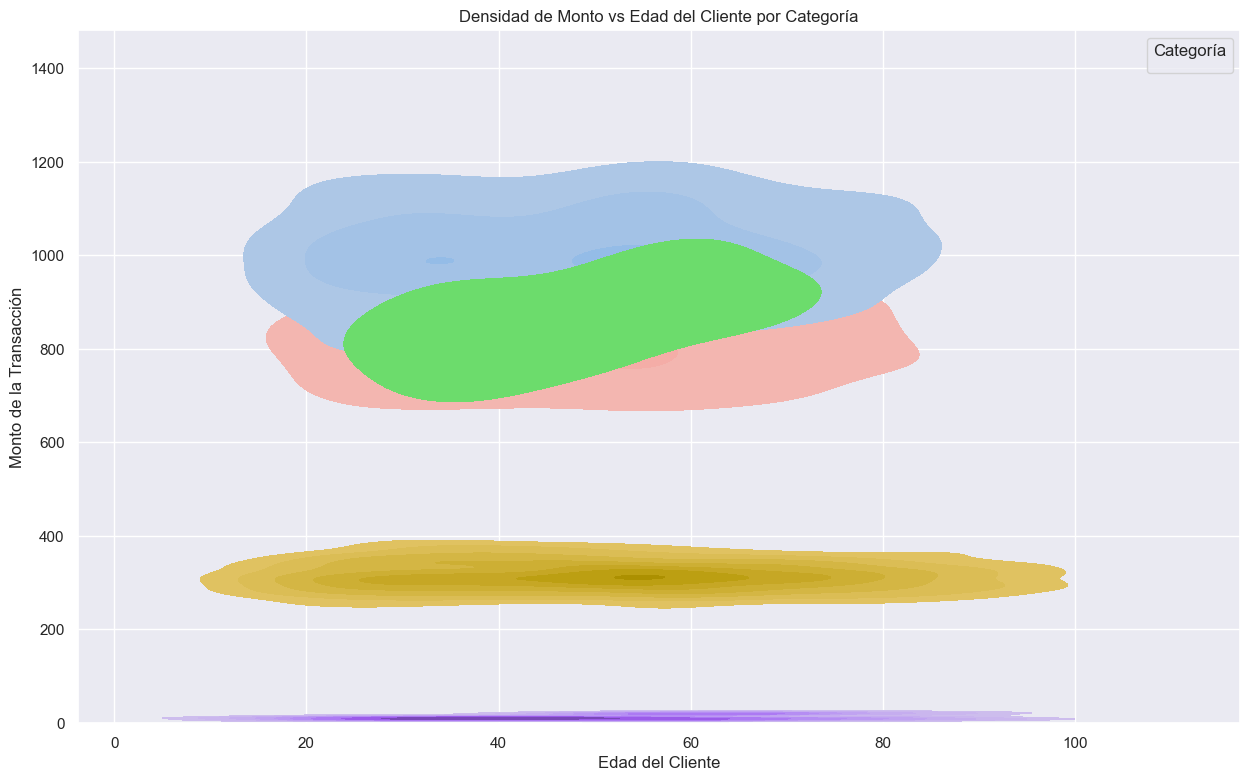

In [77]:
#otra version del de arriba
categorias_interes = ["compras_en_linea", "supermercado", "varios_en_linea", "compras", "gasolina_transporte"]
transacciones_f = transacciones_fraudulentas[transacciones_fraudulentas['categoria'].isin(categorias_interes)]
plt.figure(figsize=(15, 9))
sns.kdeplot(data=transacciones_f, x='edad_cliente', y='monto', hue='categoria', palette=paleta_colores, fill=True)
plt.xlabel("Edad del Cliente")
plt.ylabel("Monto de la Transacción")
plt.title("Densidad de Monto vs Edad del Cliente por Categoría")
plt.legend(title='Categoría')
plt.show()

**`ESTADOS POR MAYOR CANTIDAD DE FRAUDES`**

C:\Users\mikpz\AppData\Local\Temp\ipykernel_4992\694299614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='plasma')


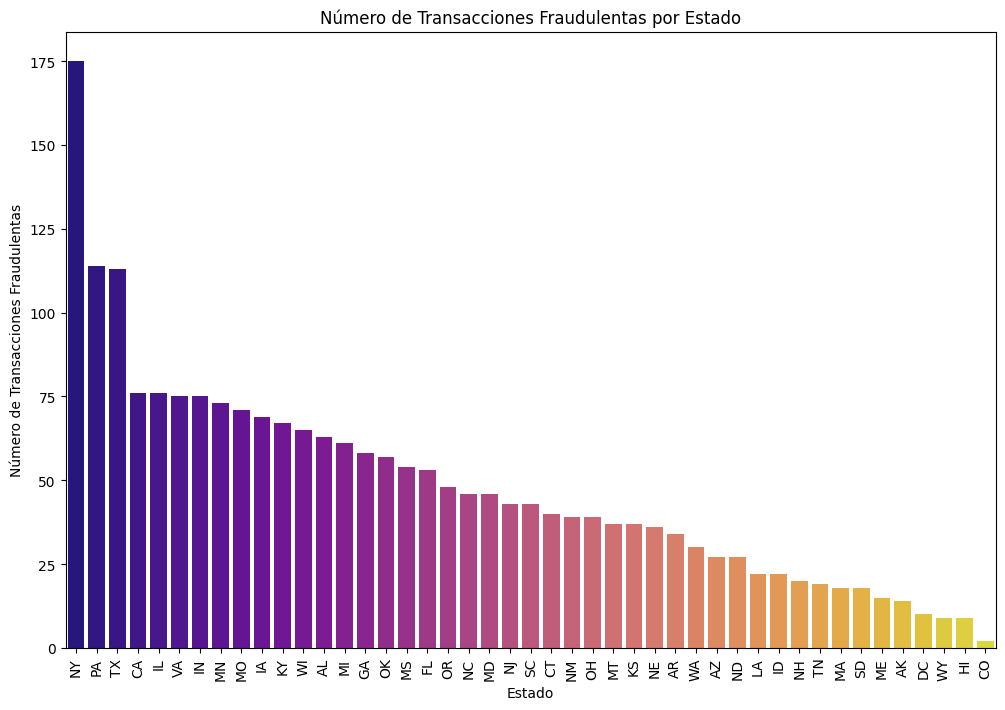

In [37]:
# Contamos las transacciones por estado
conteo_estados = transacciones_fraudulentas['estado'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='plasma')

# Agregamos etiquetas y título
plt.xticks(rotation=90)
plt.xlabel("Estado")
plt.ylabel("Número de Transacciones Fraudulentas")
plt.title("Número de Transacciones Fraudulentas por Estado")

# Mostramos el gráfico
plt.show()

OBSERVACIÓN: Se ve un alto número de transacciones fraudulentas en el estado de Nueva York (NY), superando los 150 casos, además, se observa una caída considerable, siendo Pensilvania (PA) el segundo estado con un poco más de 100 transacciones fraudulentas, seguido muy de cerca por Texas (TX).
Estos tres estados presentan las cifras más altas en transacciones fraudulentas.

**`TOP 5 ESTADOS POR GRUPO DE EDAD`**

Se seleccionaron solo 5 estados para el análisis con el fin de obtener un detalle más preciso, ya que evaluar los 44 estados podría resultar demasiado complejo. En estos 5 estados, el grupo de edad con mayor incidencia de transacciones fraudulentas es el de adultos. En contraste, el grupo de adolescentes muestra una incidencia muy baja o nula, probablemente debido a la falta de datos en este segmento. Sin embargo, en uno de los estados, el grupo juvenil se observa como "joven adulto", lo que refleja una tendencia diferente en comparación con los otros estados.

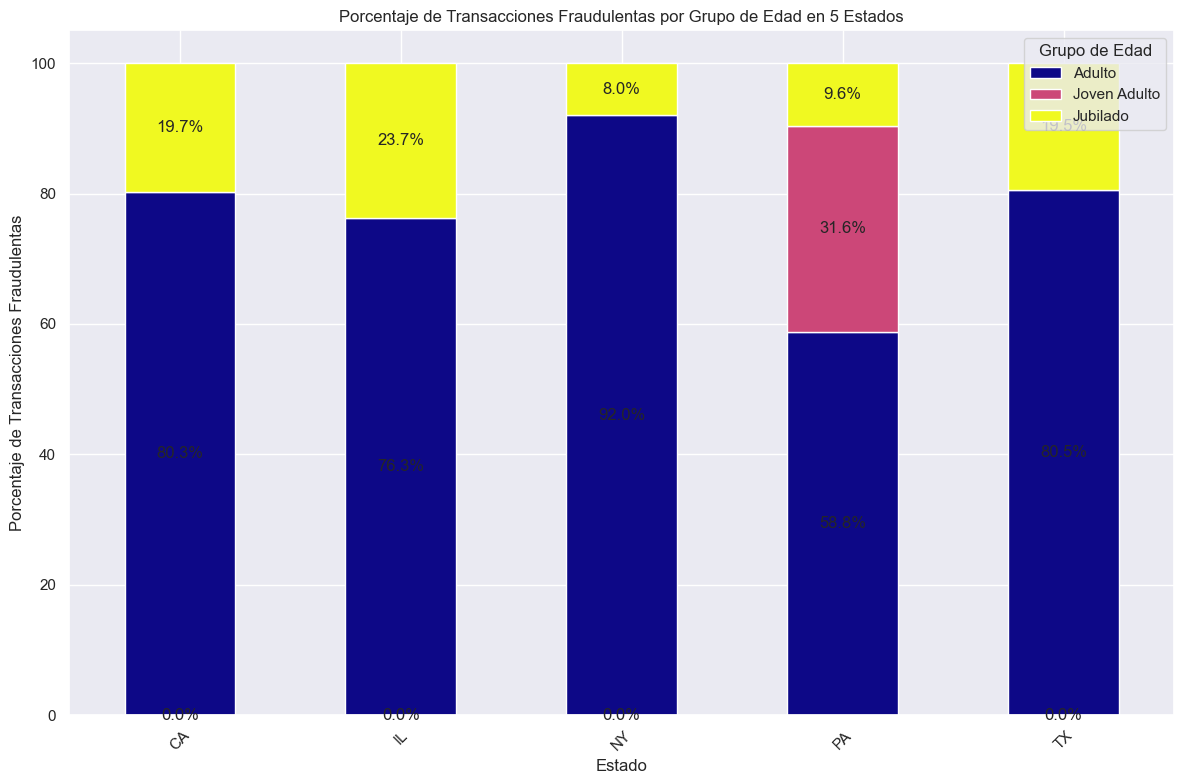

In [55]:
# 1. Selecciona los 5 estados de interés
estados_interes = ['NY', 'PA', 'TX', 'CA', 'IL']  # Reemplaza con los estados que elijas

# 2. Filtra los datos para esos estados
transacciones_filtradas = transacciones_fraudulentas[transacciones_fraudulentas['estado'].isin(estados_interes)]

# 3. Agrupa los datos por estado y grupo de edad, y cuenta el número de transacciones
conteo_edad_estado = transacciones_filtradas.groupby(['estado', 'grupo_edad']).size().unstack()

# Calcula el porcentaje de transacciones en cada grupo de edad
porcentaje_edad_estado = conteo_edad_estado.div(conteo_edad_estado.sum(axis=1), axis=0) * 100

# 4. Crea un gráfico de barras apiladas para visualizar los porcentajes
ax = porcentaje_edad_estado.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')

# Agrega etiquetas de porcentaje a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Agregamos etiquetas y título
plt.xlabel("Estado")
plt.ylabel("Porcentaje de Transacciones Fraudulentas")
plt.title("Porcentaje de Transacciones Fraudulentas por Grupo de Edad en 5 Estados")
plt.legend(title='Grupo de Edad')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


En los 5 estados seleccionados, se observa que el grupo de edad con mayor incidencia de transacciones fraudulentas es el de adultos. En contraste, el grupo de adolescentes muestra una incidencia muy baja o nula, probablemente debido a la falta de datos en este segmento. Sin embargo, en uno de los estados(PA), el grupo juvenil está representado como "joven adulto", lo que refleja una tendencia diferente en comparación con los otros estados.

**`TOP 5 ESTADOS POR 5 CATEGORIAS`**

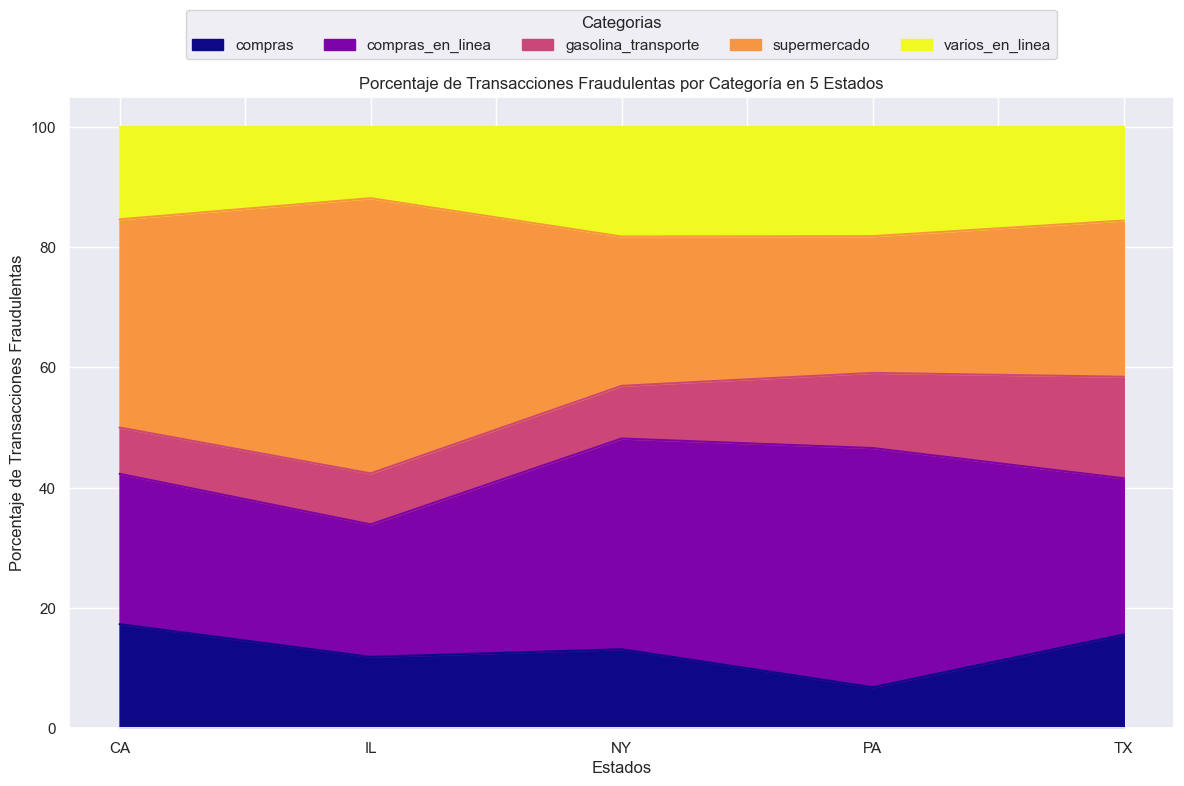

In [72]:
# Crea un gráfico de áreas apiladas
ax = porcentaje_categoria_estado.plot(kind='area', stacked=True, figsize=(12, 8), colormap='plasma')

# Agrega etiquetas de porcentaje a las áreas
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Agregamos etiquetas y título
plt.xlabel("Estados")
plt.ylabel("Porcentaje de Transacciones Fraudulentas")
plt.title("Porcentaje de Transacciones Fraudulentas por Categoría en 5 Estados")

# Coloca la leyenda en la parte superior
plt.legend(title='Categorias', bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=len(estados_interes))

plt.tight_layout()
plt.show()




En este gráfico de áreas apiladas, se muestra el porcentaje de transacciones fraudulentas por cinco categoría en cinco estados seleccionados. Se observa que "Compras en Línea" representa la mayor proporción de fraudes en la mayoría de los estados, destacándose como la categoría con el área más extensa. Esto indica que las transacciones fraudulentas en línea son predominantes en estos estados.

Sin embargo, hay dos excepciones notables: Illinois y California. En estos estados, la categoría con mayor área es "Supermercado", lo que sugiere que, en estos casos, las transacciones fraudulentas en supermercados son más comunes que las de compras en línea.

**`FRAUDE POR HORARIO`**

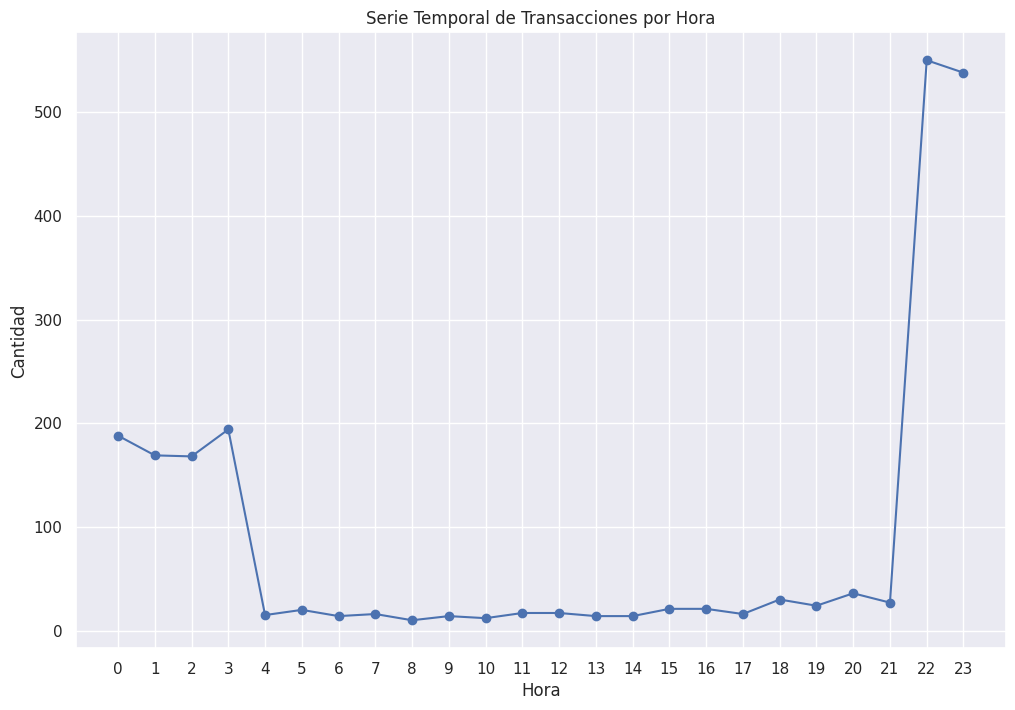

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Creamos una serie con todas las horas posibles
todas_las_horas = pd.DataFrame({'trans_hora': range(24)})

# Agrupamos por hora y calculamos conteos
conteos_por_hora = transacciones_fraudulentas.groupby("trans_hora").size().reset_index(name='cantidad')

# Unimos con todas las horas y llenar valores faltantes con ceros
conteos_completos = pd.merge(todas_las_horas, conteos_por_hora, on="trans_hora", how="left").fillna(0)

# Graficamos
plt.plot(conteos_completos["trans_hora"], conteos_completos["cantidad"], marker='o', linestyle='-')
plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.title("Serie Temporal de Transacciones por Hora")
plt.xticks(range(24))
plt.grid(True)
plt.show()

OBSERVACIÓN: Las horas con mayor actividad se encuentran en la noche, a partir de las 21 horas alcanzando un pico máximo alrededor de las 22 horas con más de 500 transacciones.

**`FRAUDE POR HORARIO Y GRUPO DE EDAD`**

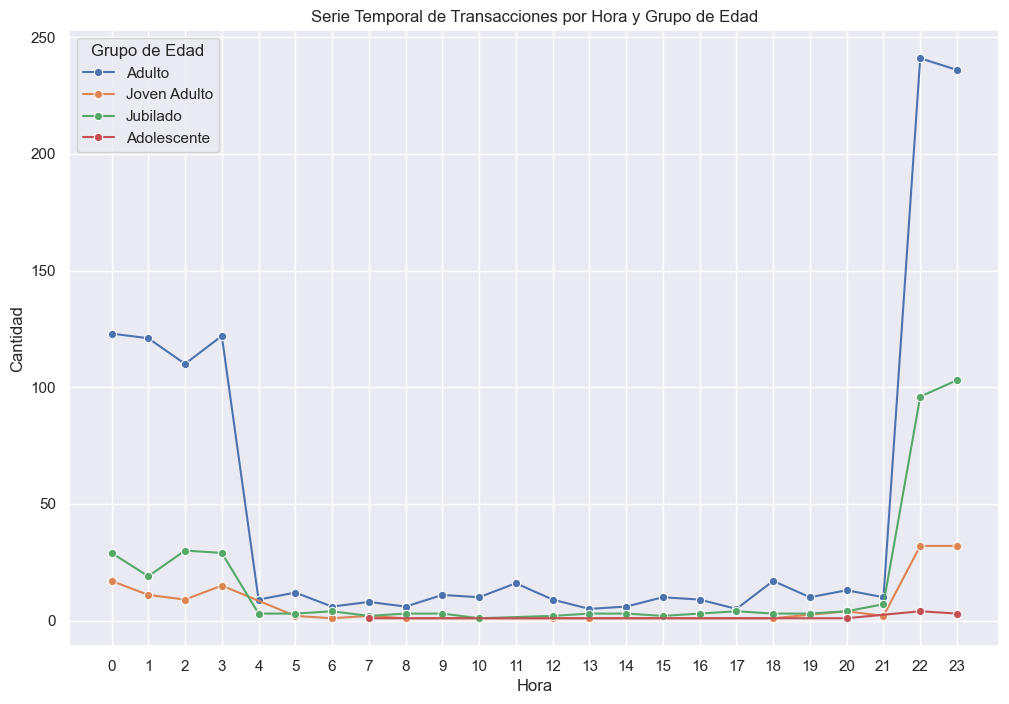

In [42]:
# Asegurarse de que el tema y el estilo de la gráfica estén configurados
sns.set_theme(style="darkgrid")

# Creamos una serie con todas las horas posibles
todas_las_horas = pd.DataFrame({'trans_hora': range(24)})

# Agrupamos por hora, grupo de edad, y calculamos conteos
conteos_por_hora = transacciones_filtradas.groupby(["trans_hora", "grupo_edad"]).size().reset_index(name='cantidad')

# Graficamos una línea para cada grupo de edad
plt.figure(figsize=(12, 8))
sns.lineplot(data=conteos_por_hora, x="trans_hora", y="cantidad", hue="grupo_edad", marker='o', linestyle='-')

# Ajustes del gráfico
plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.title("Serie Temporal de Transacciones por Hora y Grupo de Edad")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title="Grupo de Edad")
plt.show()



El análisis de las transacciones por hora y grupo de edad revela que, aunque el horario de fraude no varía significativamente entre los diferentes grupos de edad, sí se observan diferencias notables en el comportamiento de fraude. En particular, el grupo de edad "Adulto" es el que presenta la mayor incidencia de fraudes. En contraste, el grupo de "Adolescente" tiene una menor frecuencia de uso de la tarjeta de crédito y, por lo tanto, un menor nivel de fraude, incluso en los horarios con mayor cantidad de fraudes.

**`FRAUDE POR HORARIO Y GÉNERO`**

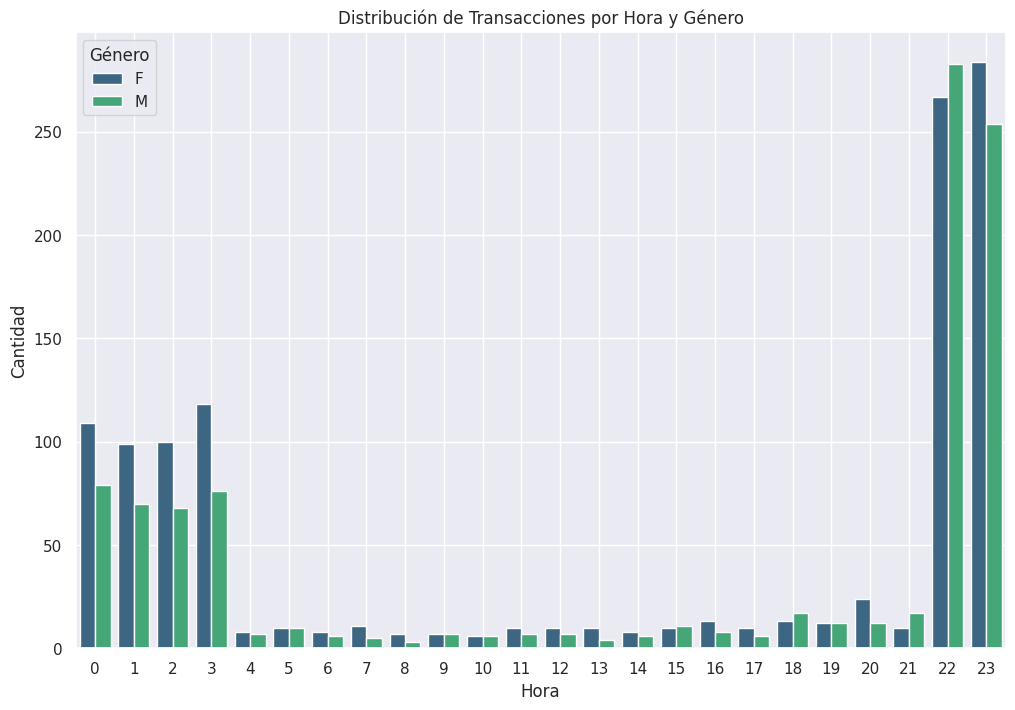

In [ ]:
# Agrupamos por hora y género, y contamos el número de eventos
conteos_por_hora_genero = transacciones_fraudulentas.groupby(['trans_hora', 'genero']).size().reset_index(name='cantidad')

# Graficamos usando barras apiladas
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Creamos el gráfico de barras apiladas
sns.barplot(data=conteos_por_hora_genero, x='trans_hora', y='cantidad', hue='genero', palette="viridis")

plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.title("Distribución de Transacciones por Hora y Género")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Género')
plt.show()

OBSERVACIÓN: Durante la madrugada de 0 a 3, se registra un mayor número de transacciones realizadas por el género femenino (Género F) en comparación con el género masculino (Género M).
Durante la tarde, la actividad se mantiene constante entre ambos géneros. En el transcurso de la noche, a partir de las 22 horas, el género masculino supera al femenino con casi 300 transacciones y una hora mas tarde, a las 23 horas, el género femenino supera al masculino, también con 300 transacciones.

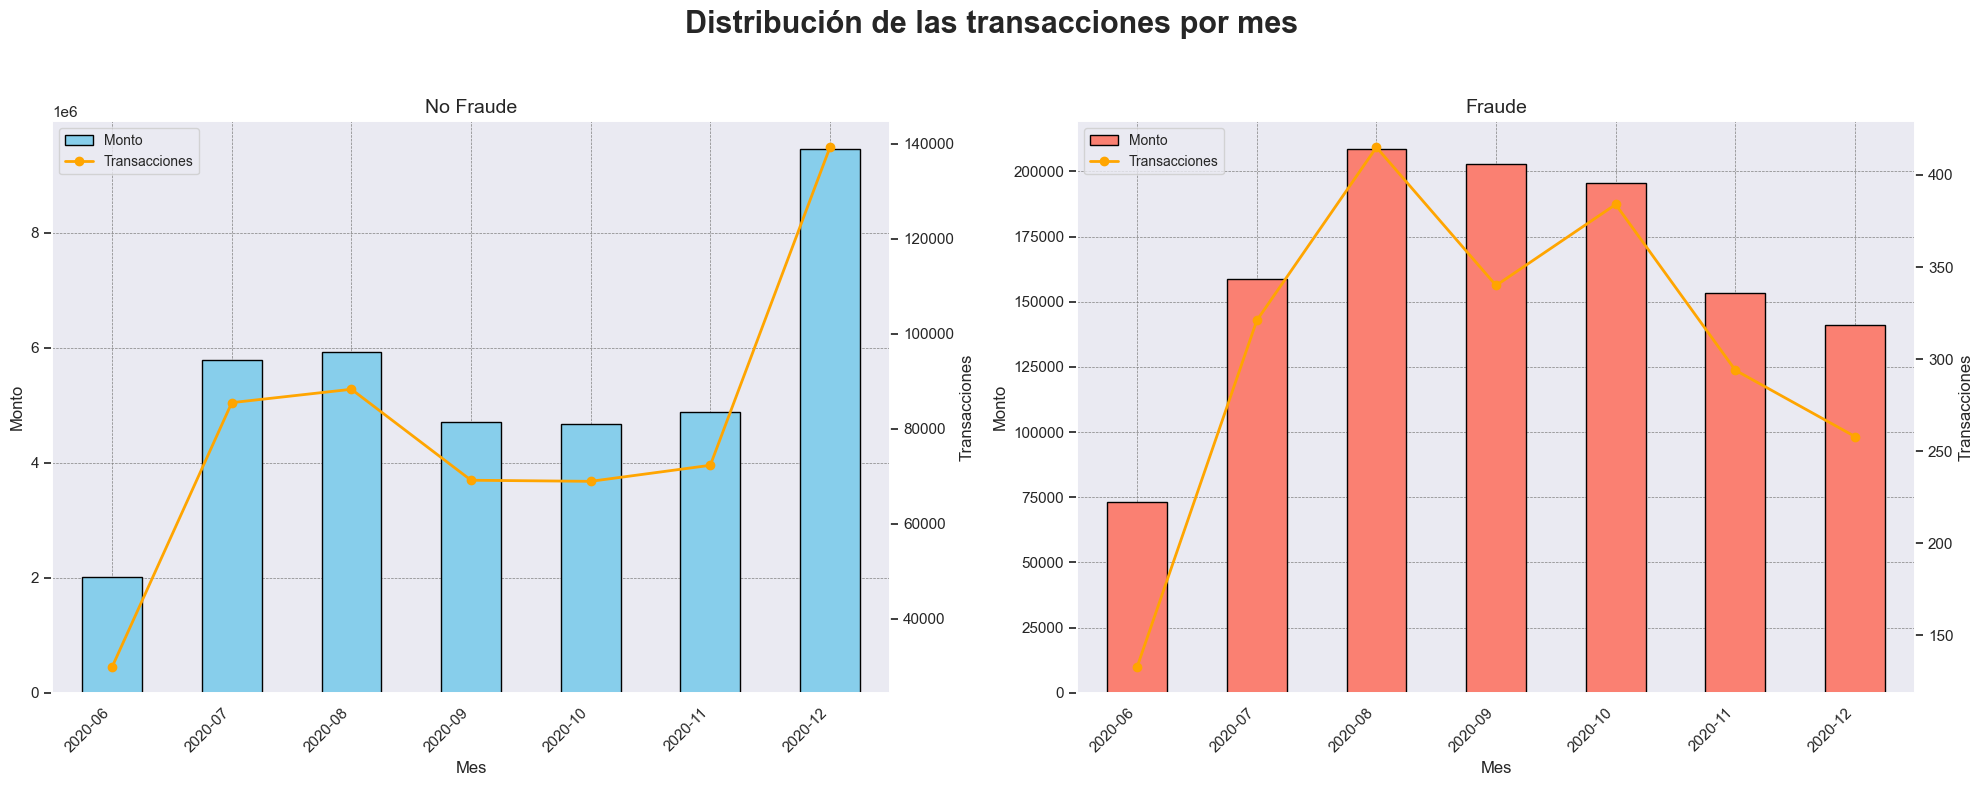

In [48]:

def plot_transactions_by_month(df_fraude):
    # Crear una figura con dos subgráficas
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=False)
    fig.suptitle("Distribución de las transacciones por mes", fontsize=22, fontweight='bold')

    # Colores para las gráficas
    colores_barras = ['skyblue', 'salmon']
    color_linea = 'orange'

    for i, ax in enumerate(axs):
        # Filtrar los datos según el tipo de fraude
        df_1 = df_fraude[df_fraude['es_fraude'] == i]

        # Gráfico de barras para el monto
        df_1.groupby('trans_mes')['monto'].sum().plot(kind='bar', ax=ax, color=colores_barras[i], label='Monto', edgecolor='black')
        ax.set_ylabel('Monto', fontsize=12)
        ax.set_xlabel('Mes', fontsize=12)
        ax.set_title(["No Fraude", "Fraude"][i], fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Crear un segundo eje y para las transacciones
        ax2 = ax.twinx()
        df_1.groupby('trans_mes').size().plot(kind='line', ax=ax2, color=color_linea, marker='o', label='Transacciones', linewidth=2)
        ax2.set_ylabel('Transacciones', fontsize=12)

        # Combinar leyendas
        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=10)

        # Mejorar apariencia del gráfico
        ax.grid(True, linestyle='--', linewidth=0.5, color='grey')
        ax2.grid(False)  # Desactivar cuadrícula en el segundo eje

    # Ajustar el diseño para que el título se muestre correctamente
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del diseño para que se ajuste el título
    plt.show()

# Llamada a la función
plot_transactions_by_month(df_fraude)

OBSERVACIÓN:

La gráfica revela un patrón claro en la actividad transaccional a lo largo del año. A partir de noviembre, se observa un notable incremento en el volumen de transacciones, alcanzando su punto máximo en diciembre, el mes con mayor actividad transaccional. Sin embargo, el análisis de la cantidad de fraudes muestra una tendencia diferente: los meses con mayor incidencia de fraudes son de agosto a octubre, con una disminución significativa en noviembre y diciembre. Este contraste sugiere que, aunque el volumen de transacciones aumenta hacia el final del año, la tasa de fraudes no sigue el mismo patrón y se concentra en meses previos.

**Eliminar columnas**

In [44]:
df_fraude.drop(columns=['num_transaccion','num_tarjeta','comerciante','nombre','apellido','calle','codigo_postal','tiempo_unix'],axis=1,inplace=True)

**Guardar Los cambios del Dataset**

In [ ]:
arch='/content/drive/My Drive/Curso Ingenias/fraud_credit.csv'
df_fraude.to_csv(arch, sep=',', index=False, encoding='utf-8')

# CONCLUSIONES

Observamos que las transacciones fraudulentas se concentran en ciertos estados como Nueva York y Pennsylvania, los cuales se encuentran geográficamente cercanos en la región noreste de Estados Unidos, además se observa como es que estas transacciones se realizan durante las horas de la noche, especialmente entre las 8:00 PM y 3:00 AM.

Se observa un aumento en la actividad transaccional desde noviembre, con un máximo en diciembre. Sin embargo, los fraudes son más frecuentes entre agosto y octubre, disminuyendo en los meses finales del año. Esto indica que, a pesar del aumento en las transacciones al final del año, los fraudes se concentran en los meses previos.

En el análisis de la relación entre la edad del cliente y la incidencia de transacciones fraudulentas, se observa que los adultos son el grupo más afectado, mientras que los adolescentes presentan una incidencia significativamente menor. Este patrón se mantiene consistente en las cinco categorías de fraude más comunes y en los estados seleccionados, donde los adultos continúan siendo el grupo más vulnerable. Esto sugiere que los adultos, debido a su mayor actividad financiera y experiencia, podrían estar más expuestos a técnicas de fraude sofisticadas.

La variabilidad en las categorías de fraude entre estados indica que los tipos de fraude pueden variar significativamente según la región. Esta diferencia regional destaca la necesidad de adaptar las estrategias de prevención a las particularidades de cada estado para abordar eficazmente los riesgos locales.

Finalmente, se observa que las transacciones fraudulentas en línea tienden a involucrar montos más elevados en comparación con otras categorías de fraude, que suelen implicar cantidades menores. Esto subraya la importancia de fortalecer las medidas de seguridad para las transacciones en línea, ya que los fraudes en esta categoría a menudo implican mayores sumas de dinero y requieren enfoques más avanzados para su detección y prevención.

In [76]:
# Instalar las librerías necesarias
# !pip install plotly requests

import plotly.express as px
import requests

# URL de un archivo GeoJSON de EE.UU.
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# Descargar el archivo GeoJSON
response = requests.get(geojson_url)
geojson = response.json()

# Crear un gráfico de dispersión geográfico utilizando Plotly
fig = px.scatter_geo(
    transacciones_fraudulentas,
    lat='latitud',  # latitud del titular de la tarjeta
    lon='longitud',  # longitud del titular de la tarjeta
    color='es_fraude',  # variable que indica si es fraude o no
    hover_data={'latitud_comerciante': True, 'longitud_comerciante': True, 'es_fraude': False},  # Muestra datos específicos al pasar el cursor
    title='Ubicación de Fraudes por Latitud y Longitud de Titular en Estados Unidos',
    color_continuous_scale=px.colors.sequential.Plasma  # Escala de colores
)

# Eliminar la leyenda de colores
fig.update_layout(coloraxis_showscale=False)

# Configuración del mapa para centrarse en Estados Unidos
fig.update_geos(
    scope="usa",
    showcountries=True,
    countrycolor="RebeccaPurple",
    showland=True,
    landcolor="LightGray",
    showocean=True,
    oceancolor="LightBlue"
)

# Mostrar el gráfico
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed